# Análisis exploratorio de datos - EDA

## Datos iniciales

Los datos a analizar corresponden a las víctimas mortales de accidentes de tránsito ocurridos en la Ciudad de Buenos Aires entre los años 2016 y 2021. Estos datos están divididos en 2 hojas de archivo .xlsx. Una de estas hojas contiene los detalles de los hechos que llevaron a la ocurrencia de los fallecimientos, tales como la cantidad de víctimas, la fecha, la hora y el lugar del accidente. En cambio, la otra hoja proporciona detalles sobre las víctimas mortales, como su edad, sexo, rol en el hecho, fecha de fallecimiento y fecha del accidente. Ambas hojas contienen un código identificador para los accidentes que permite relacionar la información de ambas. De ahora en adelante, nos referiremos a estas hojas como df_hechos y df_victimas, respectivamente.

In [1]:
# Librerias a utilizar

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
from datetime import datetime
import os

## Archivos a utilizar

In [2]:
# Ruta del archivo
ruta_archivo = 'C:/Users/57315/Documentos/Phyton_Henry/proyecto_data/dataset_iniciales/homicidios.xlsx'
# Selecciona las hojas de con los datos de interes
hoja_hechos = 'HECHOS'
hoja_victimas = 'VICTIMAS'
# Lee las hojas seleccionadas
df_hechos = pd.read_excel(ruta_archivo, sheet_name = hoja_hechos)
df_victimas = pd.read_excel(ruta_archivo, sheet_name = hoja_victimas)

## Análisis por archivo

### df_hechos

#### Revisión inicial

Este dataframe tiene 21 columnas de las cuales 4 de ellas presentan datos nulos, se revisan estos datos para verificar si se pueden imputar, dejarse como nulos o eliminarse.

Las columnas HORA, HH, pos x, pos y, presentan datos tipos object, cuando en realidad son datetime o float, por lo que se cambió el tipo de datos de acuerdo a las características de cada columna.

In [3]:
# Muestra las primeras filas del dataframe
df_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [4]:
# Brinda información resumida del dataframe
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [5]:
# Cuenta la cantidad de filas con valores nulos en cada columna
df_hechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

##### Revisión de valores nulos

In [6]:
# Muestra las filas con valores nulos en la columna calle
nulos_calle = df_hechos[df_hechos['Calle'].isnull()]
print(nulos_calle)
print(nulos_calle['Calle'])


            ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
119  2016-0151           1 2016-11-18  2016  11  18  20:35:00  20   

    LUGAR_DEL_HECHO TIPO_DE_CALLE  ... Altura  Cruce Dirección Normalizada  \
119              SD         CALLE  ...    NaN    NaN                   NaN   

    COMUNA    XY (CABA) pos x pos y PARTICIPANTES VICTIMA ACUSADO  
119      0  Point (. .)     .     .     PEATON-SD  PEATON      SD  

[1 rows x 21 columns]
119    NaN
Name: Calle, dtype: object


Según el diccionario de datos del DataFrame 'hechos', las comunas deben numerarse del 1 al 15. Sin embargo, se identificó que la fila 119 muestra una comuna con el valor 0, el cual no es válido. Además, se observa que las otras columnas que contienen información sobre el lugar del hecho presentan valores nulos en esta fila. Por consiguiente, al no aportar información relevante para el análisis, se ha tomado la decisión de eliminar esta fila.

In [7]:
# Elimina las filas con valores nulos en la columna calle
df_hechos = df_hechos.dropna(subset='Calle')

In [8]:
# Muestra las filas con valores nulos en la columna altura
nulos_altura = df_hechos[df_hechos['Altura'].isnull()]
print(nulos_altura.head(3))
print(nulos_altura['Altura'])

          ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA HH  \
0  2016-0001           1 2016-01-01  2016   1   1  04:00:00  4   
1  2016-0002           1 2016-01-02  2016   1   2  01:15:00  1   
3  2016-0004           1 2016-01-10  2016   1  10  00:00:00  0   

                             LUGAR_DEL_HECHO TIPO_DE_CALLE  ... Altura  \
0  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       AVENIDA  ...    NaN   
1          AV GRAL PAZ  Y AV DE LOS CORRALES      GRAL PAZ  ...    NaN   
3      AV LARRAZABAL Y GRAL VILLEGAS CONRADO       AVENIDA  ...    NaN   

                                 Cruce  \
0  FERNANDEZ DE LA CRUZ, F., GRAL. AV.   
1                  DE LOS CORRALES AV.   
3             VILLEGAS, CONRADO, GRAL.   

                               Dirección Normalizada COMUNA  \
0  PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...      8   
1               PAZ, GRAL. AV. y DE LOS CORRALES AV.      9   
3          LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.      8   

                

Esta columna representa la altura de la calle en la que se produjo el hecho. En varios casos donde este dato aparece como nulo, se observa que la columna 'cruce' tiene un valor no nulo. Por lo tanto, se ha tomado la decisión de reemplazar los valores nulos en la altura por cero. Se considera que la intersección de dos calles proporciona información suficiente para precisar la ubicación del lugar donde ocurrió el hecho."

In [9]:
# Reemplaza los valores nulos de la columna Altura por cero
df_hechos['Altura'] = df_hechos['Altura'].fillna(0)

In [10]:
# Muestra las filas con valores nulos de la columna cruce
nulos_cruce = df_hechos[df_hechos['Cruce'].isnull()]
print(nulos_cruce.head(3))
print(nulos_cruce['Cruce'])

           ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
2   2016-0003           1 2016-01-03  2016   1   3  07:00:00   7   
9   2016-0013           1 2016-02-10  2016   2  10  11:30:00  11   
14  2016-0020           1 2016-02-17  2016   2  17  16:00:00  16   

       LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  Altura  Cruce  \
2   AV ENTRE RIOS 2034       AVENIDA  ...  2034.0    NaN   
9   AV ENTRE RIOS 1366       AVENIDA  ...  1366.0    NaN   
14        SUIPACHA 156         CALLE  ...   156.0    NaN   

   Dirección Normalizada COMUNA                                XY (CABA)  \
2    ENTRE RIOS AV. 2034      1   Point (106684.29090040 99706.57687843)   
9    ENTRE RIOS AV. 1366      1  Point (106616.41069662 100496.44662323)   
14          SUIPACHA 156      1  Point (107684.31807562 102519.17333314)   

           pos x         pos y PARTICIPANTES VICTIMA ACUSADO  
2   -58.39040293  -34.63189362     MOTO-AUTO    MOTO    AUTO  
9   -58.39114932  -34.62477387   PEATON-AUTO  PEATON   

Esta columna representa el nombre de una calle en caso de que el hecho se haya dado en la intersección de dos calles. Se observa que varias filas presentan valores nulos en esta columna, pero tienen valores no nulos en la columna 'altura'. Por lo tanto, se ha decidido reemplazar los valores nulos por cero. Se considera que con la información de las columnas 'calle' y 'altura' es suficiente para determinar la ubicación del hecho."

In [11]:
# Reemplaza los valores nulos de la columna Altura por cero
df_hechos['Cruce'] = df_hechos['Cruce'].fillna(0)

In [12]:
# Muestra las filas con datos nulos para columna dirección_normalizada
nulos_direccion = df_hechos[df_hechos['Dirección Normalizada'].isnull()]
print(nulos_direccion)

            ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
38   2016-0052           1 2016-04-20  2016   4  20  20:00:00  20   
106  2016-0136           1 2016-10-25  2016  10  25  00:00:00   0   
180  2017-0050           2 2017-04-28  2017   4  28  11:08:08  11   
181  2017-0051           1 2017-05-01  2017   5   1  03:47:47   3   
313  2018-0039           1 2018-04-21  2018   4  21  22:15:00  22   
546  2020-0026           1 2020-05-17  2020   5  17  06:40:00   6   
621  2021-0023           1 2021-03-01  2021   3   1  09:20:00   9   

                             LUGAR_DEL_HECHO TIPO_DE_CALLE  ... Altura  Cruce  \
38                AUTOPISTA LUGONES PK 10000     AUTOPISTA  ...    0.0      0   
106         AU BUENOS AIRES - LA PLATA KM. 4     AUTOPISTA  ...    0.0      0   
180  AU PERITO MORENO Y RAMAL ENLACE AU1/AU6     AUTOPISTA  ...    0.0      0   
181                       AU DELLEPIANE 2400     AUTOPISTA  ...    0.0      0   
313                 AUTOPISTA LUGONES KM 4

Esta columna representa la dirección del hecho en formato USIG. Las filas que presentan datos nulos en esta columna también muestran valores de cero para las columnas 'altura' y 'cruce', así como la ausencia de caracteres numéricos en las columnas 'XY (CABA)', 'pos x' y 'pos y', que se refieren a la geolocalización, longitud y latitud respectivamente. Debido a esta falta de información, las filas en cuestión no aportan datos relevantes. Por lo tanto, se ha decidido eliminarlas.

In [13]:
# Elimina las filas con valores nulos en la columna dirección_normalizada
df_hechos = df_hechos.dropna(subset = 'Dirección Normalizada')

##### Cambio de formato

In [14]:
#Cambia el tipo de datos a solo fecha
#df_hechos['FECHA'] = pd.to_datetime(df_hechos['FECHA'], errors='coerce')
# Extraer solo la parte de la fecha
#df_hechos['FECHA'] = df_hechos['FECHA'].dt.date

In [15]:
# Cambia la columna hora a formato de tiempo
df_hechos['HORA'] = pd.to_datetime(df_hechos['HORA'], format='%H:%M:%S', errors='coerce')
# Extrae solo la hora en formato hh:mm:ss
df_hechos['HORA'] = df_hechos['HORA'].dt.strftime('%H:%M:%S')

In [16]:
# Cambia las columnas a formato numerico
df_hechos['HH'] = pd.to_numeric(df_hechos['HH'], downcast='integer', errors='coerce')
df_hechos['pos x'] = pd.to_numeric(df_hechos['pos x'], downcast='float', errors='coerce')
df_hechos['pos y'] = pd.to_numeric(df_hechos['pos y'], downcast='float', errors='coerce')

Durante el proceso de conversión de formato, se identificaron nuevos datos nulos en las columnas 'HORA' y 'HH'. Al examinar esta fila específica en los datos originales, se observó que estos valores faltantes corresponden a 'SD', indicando que no hay datos disponibles. Dado que no es posible imputar estos valores, se ha tomado la decisión de eliminar esta fila, ya que no es factible realizar cálculos con estos datos faltantes.

In [17]:
# Muestra las filas con datos nulos en la columna HH
nulos_hh = df_hechos[df_hechos['HH'].isnull()]
print(nulos_hh)

            ID  N_VICTIMAS      FECHA  AAAA  MM  DD HORA  HH  \
518  2019-0103           1 2019-12-18  2019  12  18  NaN NaN   

             LUGAR_DEL_HECHO TIPO_DE_CALLE  ... Altura   Cruce  \
518  PAZ, GRAL. AV. Y GRIVEO      GRAL PAZ  ...    0.0  GRIVEO   

       Dirección Normalizada COMUNA                               XY (CABA)  \
518  PAZ, GRAL. AV. y GRIVEO     11  Point (94643.11254058 103831.57115061)   

         pos x      pos y  PARTICIPANTES VICTIMA ACUSADO  
518 -58.521694 -34.594715      MOTO-MOTO    MOTO    MOTO  

[1 rows x 21 columns]


In [18]:
df_hechos = df_hechos.dropna(subset = 'HH')

Se encontraron nuevos valores nulos en las columnas 'pos x' y 'pos y'. Al examinar el contenido de las otras columnas en estas filas, se observó que tanto las columnas 'altura' como 'cruce' tenían valores de cero, mientras que la columna 'xy (CABA)' contenía valores no válidos. Dado que no es posible imputar un valor válido a estas celdas, se ha tomado la decisión de eliminarlas.

In [19]:
nulos_pos_x = df_hechos[df_hechos['pos x'].isnull()]
print(nulos_pos_x)

            ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA    HH  \
139  2016-0174           1 2016-12-27  2016  12  27  00:00:00   0.0   
176  2017-0042           1 2017-04-10  2017   4  10  09:00:00   9.0   
256  2017-0140           1 2017-11-19  2017  11  19  23:22:17  23.0   
559  2020-0039           1 2020-09-01  2020   9   1  19:17:42  19.0   

                   LUGAR_DEL_HECHO TIPO_DE_CALLE  ... Altura  Cruce  \
139           AUTOPISTA 25 DE MAYO     AUTOPISTA  ...    0.0      0   
176  AV. LEOPOLDO LUGONES PKM 6900      GRAL PAZ  ...    0.0      0   
256    AU ARTURO FRONDIZI PKM 3100     AUTOPISTA  ...    0.0      0   
559                MURGUIONDO 2700         CALLE  ...    0.0      0   

                          Dirección Normalizada COMUNA    XY (CABA) pos x  \
139                        AUTOPISTA 25 DE MAYO      0  Point (. .)   NaN   
176                       LUGONES, LEOPOLDO AV.     14  Point (. .)   NaN   
256  AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI      4  P

In [20]:
# Elimina las filas con valores nulos en la columna pos x
df_hechos = df_hechos.dropna(subset='pos x')

In [21]:
# Cambia el formato de las columnas a enteros
df_hechos['HH'] = pd.to_numeric(df_hechos['HH'], downcast='integer')
df_hechos['Altura'] = pd.to_numeric(df_hechos['Altura'], downcast='integer')

##### Revisión de valores únicos

In [74]:
df_hechos['ID'].unique()

array(['2016-0001', '2016-0002', '2016-0003', '2016-0004', '2016-0005',
       '2016-0008', '2016-0009', '2016-0010', '2016-0012', '2016-0013',
       '2016-0015', '2016-0016', '2016-0017', '2016-0019', '2016-0020',
       '2016-0021', '2016-0022', '2016-0025', '2016-0026', '2016-0027',
       '2016-0028', '2016-0029', '2016-0031', '2016-0034', '2016-0035',
       '2016-0036', '2016-0037', '2016-0038', '2016-0039', '2016-0041',
       '2016-0043', '2016-0044', '2016-0045', '2016-0047', '2016-0048',
       '2016-0049', '2016-0050', '2016-0051', '2016-0053', '2016-0054',
       '2016-0055', '2016-0056', '2016-0058', '2016-0059', '2016-0064',
       '2016-0065', '2016-0067', '2016-0068', '2016-0069', '2016-0073',
       '2016-0074', '2016-0075', '2016-0076', '2016-0077', '2016-0078',
       '2016-0079', '2016-0080', '2016-0081', '2016-0082', '2016-0083',
       '2016-0084', '2016-0085', '2016-0086', '2016-0087', '2016-0088',
       '2016-0089', '2016-0090', '2016-0092', '2016-0093', '2016

In [22]:
# Revisa valores únicos de la columna AAAA
df_hechos['AAAA'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

Los valores de la columna AAAA estan acordes a los años correspondientes al periodoo de tiempo registrado.

In [23]:
# Revisa valores únicos de la columna MM
df_hechos['MM'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Los valores de al columna MM corresponden a la numeración de los meses.

In [24]:
# Revisa valores únicos de la columna DD
df_hechos['DD'].unique()

array([ 1,  2,  3, 10, 21, 24, 29,  8, 14, 15, 17, 28,  4, 12, 13, 19, 23,
       30, 31, 11, 20, 22, 25, 26, 16, 18, 27,  7,  9,  5,  6],
      dtype=int64)

Los valores de al columna DD corresponden a la numeración de los días del mes.

In [25]:
# Revisa valores únicos de la columna tipo de calle
df_hechos['TIPO_DE_CALLE'].unique()


array(['AVENIDA', 'GRAL PAZ', 'CALLE', 'AUTOPISTA'], dtype=object)

Los valores de la columna 'TIPO_DE_CALLE' corresponden a los mismos definidos en el diccionario de datos.

In [26]:
df_hechos['VICTIMA'].unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

Se observa que los valores 'OBJETO FIJO' y 'PEATON_MOTO' en la columna 'VICTIMA' no están alineados con los definidos en el diccionario de datos. Específicamente, resulta incoherente que la víctima sea catalogada como 'OBJETO FIJO', dado que se refiere al vehículo que ocupaba la víctima. Se revisan las filas que contienen estos valores para determinar las acciones necesarias, como posiblemente eliminar o corregir estos datos inconsistentes.

In [27]:
df_hechos[df_hechos['VICTIMA'] == 'OBJETO FIJO']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
230,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,...,0,MACHAIN,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.494911,-34.547955,AUTO-OBJETO FIJO,OBJETO FIJO,AUTO


Después de una revisión de los datos, se ha identificado que los valores de las columnas 'VICTIMA' y 'ACUSADO' parecen estar intercambiados. Esta conclusión se basa en la observación de que la columna 'PARTICIPANTES', que combina ambas, presenta el valor 'AUTO-OBJETO FIJO', lo que sugiere una inconsistencia en la asignación de roles. Para corregir esta discrepancia, se ha decidido asignar los valores adecuados a las columnas 'VICTIMA' y 'ACUSADO' de acuerdo con el contexto del incidente.

In [28]:
# Reemplazar los valores en la fila específica de las columnas específicas
df_hechos.at[230, 'VICTIMA'] = 'AUTO'
df_hechos.at[230, 'ACUSADO'] = 'OBJETO FIJO'	

In [29]:
df_hechos[df_hechos['VICTIMA'] == 'PEATON_MOTO']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
583,2020-0063,2,2020-12-05,2020,12,5,07:10:00,7,NUEVA YORK Y ALTA GRACIA,CALLE,...,0,ALTA GRACIA,NUEVA YORK y ALTA GRACIA,11,Point (94080.62190808 102083.62453795),-58.52784,-34.61047,PEATON_MOTO-MOTO,PEATON_MOTO,MOTO


Al revisar la fila de este dataframe y el ID correspondiente en el dataframe víctimas, se encontró que hubo dos víctimas en el accidente: un peatón y un pasajero de una moto. Para mantener esta información y garantizar que esté en línea con el diccionario de datos, se ha tomado la decisión de dividir la fila en dos filas separadas, una para cada tipo de víctima, y ajustar las columnas 'N_VICTIMAS', 'PARTICIPANTES' y 'VICTIMA' en consecuencia, para posteriormente eliminar la fila original.

In [30]:
# Obtiene los datos de la fila 583
datos_fila_583 = df_hechos.loc[583]
# Crea dos nuevas filas para cada víctima
nueva_fila_peaton = datos_fila_583.copy()
nueva_fila_moto = datos_fila_583.copy()
# Ajusta valores de columnas afectadas
nueva_fila_peaton['VICTIMA'] = 'PEATON'
nueva_fila_peaton['N_VICTIMAS'] = 1
nueva_fila_peaton['PARTICIPANTES'] = 'PEATON-MOTO'

nueva_fila_moto['VICTIMA'] = 'MOTO'
nueva_fila_moto['N_VICTIMAS'] = 1
nueva_fila_moto['PARTICIPANTES'] = 'MOTO-MOTO'

# Convierte la nueva fila en un DataFrame
nueva_fila_peaton_df = pd.DataFrame([nueva_fila_peaton])
nueva_fila_moto_df = pd.DataFrame([nueva_fila_moto])

# Elimina la fila original
df_hechos = df_hechos.drop(index= 583, axis=0)

# Agrega las nuevas filas al DataFrame
df_hechos = pd.concat([df_hechos, nueva_fila_peaton_df, nueva_fila_moto_df], ignore_index=True)


In [31]:
df_hechos['ACUSADO'].unique()

array(['AUTO', 'PASAJEROS', 'SD', 'OBJETO FIJO', 'CARGAS', 'MOTO',
       'MULTIPLE', 'OTRO', 'BICICLETA', 'TREN'], dtype=object)

Los valores de la columna 'ACUSADO' corresponden a los mismos definidos en el diccionario de datos.

#### Estadísticas descriptivas

In [32]:
df_hechos.describe(include='all')

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
count,684,684.000000,684,684.000000,684.000000,684.000000,684,684.000000,684,684,...,684.000000,684.0,684,684.000000,684,684.000000,684.000000,684,684,684
unique,683,NaN,NaN,NaN,NaN,NaN,316,NaN,670,4,...,NaN,317.0,631,NaN,605,NaN,NaN,40,8,10
top,2020-0063,NaN,NaN,NaN,NaN,NaN,21:00:00,NaN,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,NaN,0.0,27 DE FEBRERO AV. y ESCALADA AV.,NaN,Point (101721.59002217 93844.25656649),NaN,NaN,PEATON-PASAJEROS,MOTO,AUTO
freq,2,NaN,NaN,NaN,NaN,NaN,10,NaN,4,429,...,NaN,159.0,5,NaN,5,NaN,NaN,105,288,201
mean,NaN,1.027778,2018-09-18 12:56:50.526315776,2018.200292,6.690058,15.922515,NaN,11.647661,NaN,NaN,...,629.277778,NaN,NaN,7.421053,NaN,-58.441555,-34.619656,NaN,NaN,NaN
min,NaN,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,NaN,0.000000,NaN,NaN,...,0.000000,NaN,NaN,1.000000,NaN,-58.529942,-34.705250,NaN,NaN,NaN
25%,NaN,1.000000,2017-04-03 00:00:00,2017.000000,4.000000,9.000000,NaN,6.000000,NaN,NaN,...,0.000000,NaN,NaN,4.000000,NaN,-58.476217,-34.643690,NaN,NaN,NaN
50%,NaN,1.000000,2018-07-16 00:00:00,2018.000000,7.000000,16.000000,NaN,11.000000,NaN,NaN,...,0.000000,NaN,NaN,8.000000,NaN,-58.444511,-34.622929,NaN,NaN,NaN
75%,NaN,1.000000,2020-01-06 12:00:00,2020.000000,10.000000,23.000000,NaN,17.000000,NaN,NaN,...,0.000000,NaN,NaN,11.000000,NaN,-58.401840,-34.597013,NaN,NaN,NaN
max,NaN,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,NaN,23.000000,NaN,NaN,...,16080.000000,NaN,NaN,15.000000,NaN,-58.356083,-34.534653,NaN,NaN,NaN


- Hay un total de 684 valores de ID y 682 de ellos son unicos, lo cual indica que solo hay un ID repetido, esto se da porque se realizó la división de una fila en dos, para que los valores de la variable 'VICTIMA' estuvieran acorde al diccionario de datos.

- Durante el periodo de tiempo analizado, la fecha con mayor registro de accidentes de transito con victimas mortales es el 13 de junio de 2016, con un total de 3.

- La hora con mayor ocurrencia de hechos es 21 horas, con una frecuencia de 10, esto puede sugerir una tendencia de mayor riesgo a determinadas horas del día.

- El tipo de calle con mayor accidentalidad son las avenidas con un total de 429 hechos resgistrados, esto puede ayudar a identificar los sitios con risgo más alto.

- Las victimas  más comunes corresponden a ocupantes de motos.

#### Visualización de datos

In [33]:
# Crea una nueva columna con el dia de la semana en la que ocurrio el hecho
df_hechos['FECHA'] = pd.to_datetime(df_hechos['FECHA'])
df_hechos['dia_semana'] = df_hechos['FECHA'].dt.dayofweek

In [34]:
# Cuenta la cantidad de accidentes por año, mes
accidentes_por_año = df_hechos.groupby('AAAA').size()
accidentes_por_mes = df_hechos.groupby('MM').size()
accidentes_por_dia_semana = df_hechos.groupby('dia_semana').size()
accidentes_por_hora = df_hechos.groupby('HH').size()

In [35]:
print(accidentes_por_año)
print(accidentes_por_mes)
print(accidentes_por_dia_semana)
print(accidentes_por_hora)

AAAA
2016    140
2017    127
2018    142
2019    102
2020     77
2021     96
dtype: int64
MM
1     62
2     56
3     50
4     46
5     58
6     58
7     51
8     65
9     46
10    50
11    65
12    77
dtype: int64
dia_semana
0    103
1     96
2     96
3     94
4     95
5    103
6     97
dtype: int64
HH
0     21
1     24
2     17
3     25
4     23
5     35
6     39
7     42
8     31
9     34
10    31
11    26
12    32
13    17
14    33
15    25
16    30
17    30
18    31
19    29
20    24
21    29
22    29
23    27
dtype: int64


c:\Users\57315\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57315\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57315\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57315\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

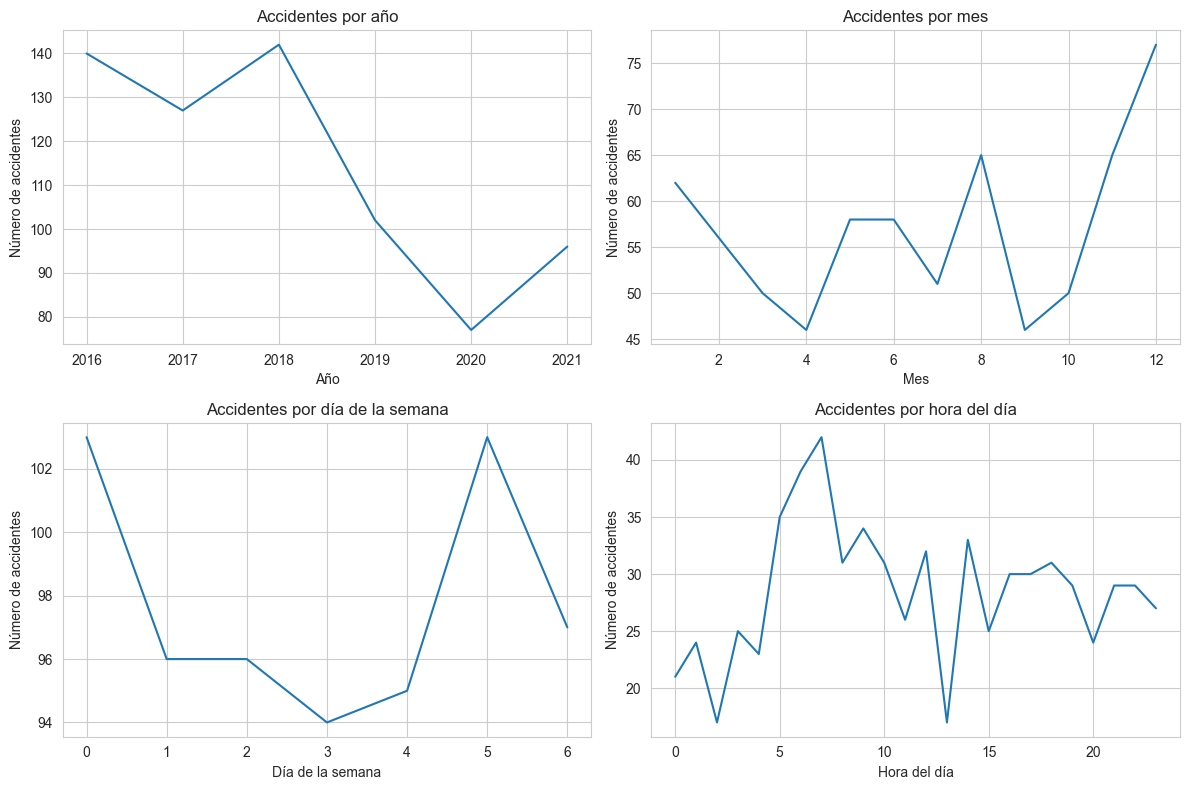

In [36]:
# Gráfico de lineas cantidad de accidentes respecto al tiempo

# Configura el estilo de seaborn
sns.set_style("whitegrid")

# Crea la figura y las subtramas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico de accidentes por año
sns.lineplot(x=accidentes_por_año.index, y=accidentes_por_año.values, ax=axes[0, 0])
axes[0, 0].set_title('Accidentes por año')
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Número de accidentes')

# Gráfico de accidentes por mes
sns.lineplot(x=accidentes_por_mes.index, y=accidentes_por_mes.values, ax=axes[0, 1])
axes[0, 1].set_title('Accidentes por mes')
axes[0, 1].set_xlabel('Mes')
axes[0, 1].set_ylabel('Número de accidentes')

# Gráfico de accidentes por día de la semana
sns.lineplot(x=accidentes_por_dia_semana.index, y=accidentes_por_dia_semana.values, ax=axes[1, 0])
axes[1, 0].set_title('Accidentes por día de la semana')
axes[1, 0].set_xlabel('Día de la semana')
axes[1, 0].set_ylabel('Número de accidentes')

# Gráfico de accidentes por hora
sns.lineplot(x=accidentes_por_hora.index, y=accidentes_por_hora.values, ax=axes[1, 1])
axes[1, 1].set_title('Accidentes por hora del día')
axes[1, 1].set_xlabel('Hora del día')
axes[1, 1].set_ylabel('Número de accidentes')

# Ajusta el diseño
plt.tight_layout()

# Muestra el gráfico
plt.show()


Los años 2016 y 2018 muestran una notable cantidad de accidentes en comparación con los años 2020 y 2021. Esto podría atribuirse a las medidas de restricción de circulación implementadas durante esos años debido a un problema de salud pública mundial. Además, en los años 2017 y 2019 se observa una reducción en la cantidad de accidentes con respecto al año anterior del 9.28% y 28.17%.

Los meses de diciembre, noviembre y agosto, presentan la mayor accidentalidad, esto puede deberse a que en estos meses se celebran varias festividades religiosas y nacionales, lo que implica una mayor cantidad de personas y vehiculos circulando en las calles y por lo tanto hay un mayor riesgo potencial de accidentes, esto puede ser util para la planificación de medidas adicionales durante fechas de alto tráfico vehicular.

Los dias lunes y sabado fueron los días con mayor cantidad de accidentes 103, sin embargo no son muy diferentes de los demas días los cuales estan en un rango entre 94 y 97.

Las horas con mas accidentes son las 7 y 6 horas, con 42 y 39 resgistros respectivamente, mientras las horas con menos accidentes son las 2 y las 13 horas ambas con 17 registros, esto sugiere que hay mayor ocurrencia en las horas pico de la manaña que en las de la tarde, , lo cual es consistente con el tráfico intenso durante las horas de la mañana cuando las personas se dirigen al trabajo, la escuela u otras actividades.

In [37]:
# Muestra tabla de frecuencia de tipo de calle
df_hechos['TIPO_DE_CALLE'].value_counts()

TIPO_DE_CALLE
AVENIDA      429
CALLE        135
GRAL PAZ      63
AUTOPISTA     57
Name: count, dtype: int64

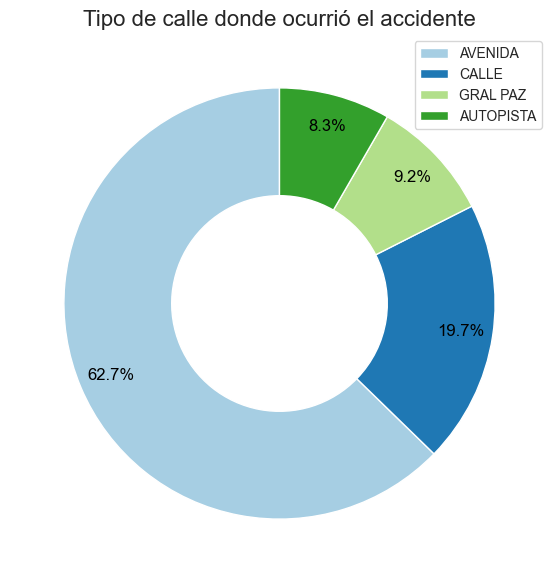

In [38]:
# Grafico de torta tipo de calle

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Tabla de frecuencia de tipo de calle
tipo_calle_counts = df_hechos['TIPO_DE_CALLE'].value_counts()

# Configura el tamaño del gráfico
plt.figure(figsize=(7, 7))

# Crea el gráfico de torta
plot = tipo_calle_counts.plot(kind='pie', 
                              labels=None, # Elimina las etiquetas por defecto
                              autopct='%1.1f%%', # Muestra los porcentajes en las porciones
                              startangle=90, # Gira el gráfico para que empiece en 90 grados (12 en punto)
                              colors=sns.color_palette("Paired"), # Utiliza una paleta de colores de Seaborn
                              wedgeprops=dict(width=0.5), # Controla el grosor de las porciones
                              textprops={'fontsize': 12, 'color': 'black'}, # Configura el tamaño y color de las etiquetas
                              pctdistance=0.85) # Ajusta la distancia de los porcentajes del centro

# Agrega las etiquetas de leyenda
plt.legend(labels=tipo_calle_counts.index, loc="best")

# Añade un título
plt.title('Tipo de calle donde ocurrió el accidente', fontsize=16)

# Elimina el eje y
plt.ylabel(None)

# Muestra el gráfico
plt.show()


Más del 80% de los accidentes se presentaron en calles tipo avenida o calle, lo que sugiere que estas vías son las más propensas a la accidentalidad. Es importante destacar la importancia de revisar e implementar medidas de seguridad y regulaciones de tráfico en estas áreas para reducir la incidencia de accidentes y mejorar la seguridad vial.

In [39]:
# Muestra tabla de frecuencia de victima
df_hechos['VICTIMA'].value_counts()


VICTIMA
MOTO         288
PEATON       262
AUTO          83
BICICLETA     29
SD             8
CARGAS         7
PASAJEROS      5
MOVIL          2
Name: count, dtype: int64

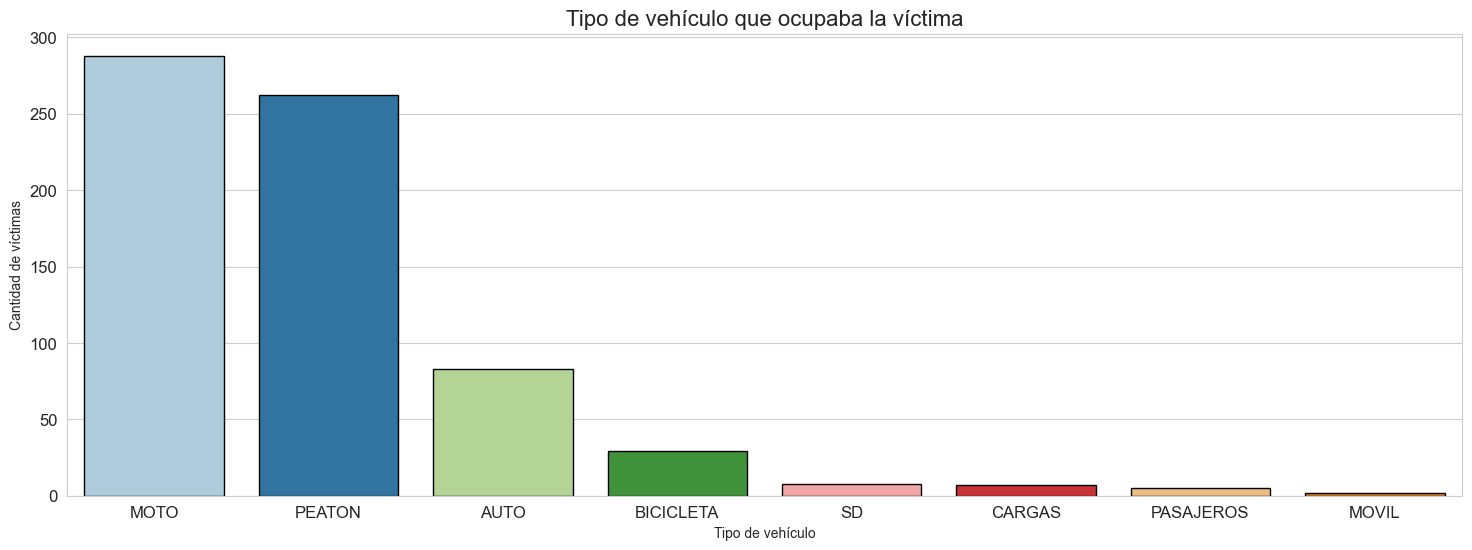

In [40]:
# Gráfico de barras tipo de vehículo que ocupaba la víctima

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Tabla de frecuencia de vehículo que ocupaba la víctima
victima_counts = df_hechos['VICTIMA'].value_counts()

# Configura el tamaño del gráfico
plt.figure(figsize=(18, 6))

# Crea el gráfico de barras
sns.barplot(x=victima_counts.index, y=victima_counts, palette="Paired", edgecolor='black')

# Añade un título
plt.title('Tipo de vehículo que ocupaba la víctima', fontsize=16)


# Añade el eje y
plt.ylabel('Cantidad de víctimas')

# Añade el eje x
plt.xlabel('Tipo de vehículo')

# Aumenta el tamaño de la fuente en los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Muestra el gráfico
plt.show()


La gran mayoria de las victimas se encontraban en una moto o eran peatones, lo que sugiere que son los grupos mas vulnerables durante la ocurrencia de los accidentes; la identificación de estos grupos puede ayudar a establecer el enfoque en el diseño de politicas de prevención de accidentes.

c:\Users\57315\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57315\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57315\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57315\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

<Figure size 1200x600 with 0 Axes>

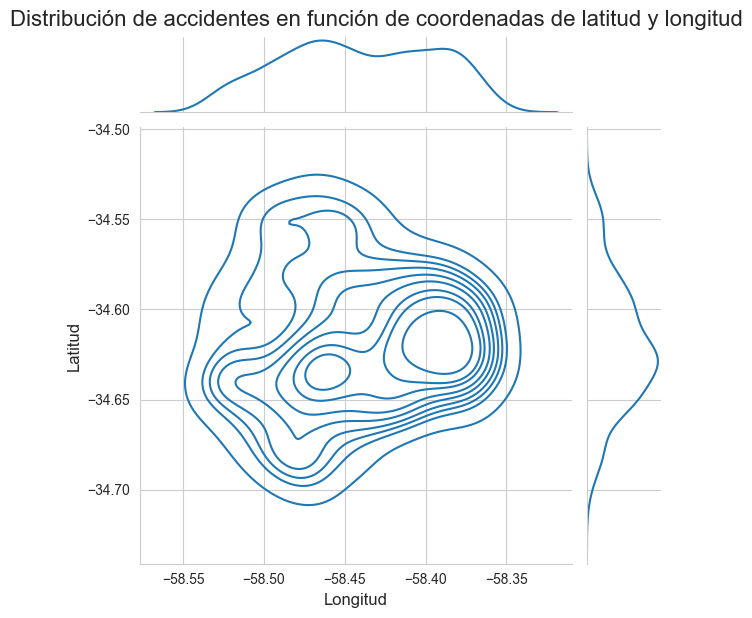

In [41]:
# Gráfico de densidad de kernel de coordenadas de los hechos
# Configurar el estilo de seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
# Gráfico de distribución conjunta con estimación de densidad kernel (kde)
g = sns.jointplot(
    data=df_hechos,
    x="pos x", y="pos y",
    kind="kde", palette="Paired"
)

# Añadir títulos y etiquetas
g.set_axis_labels("Longitud", "Latitud", fontsize=12)
g.fig.suptitle("Distribución de accidentes en función de coordenadas de latitud y longitud", fontsize=16, y=1.02)

# Mostrar el gráfico
plt.show()


El área con mayor ocurrencia de accidnetes estan comprendidas entre las latitudes -34.65 y -34.60 y las longitudes -58.40 y -58.35; esto puede ayudar a identificar los puntos calientes de accidentes.

#### Análisis de correlación

**Coeficiente de correlacion de Pearson**

Para que los resultados de esta medida sean validos, deben cumplirse las siguientes condiciones:
- Las 2 variables deben ser numéricas
- La relación debe ser de tipo lineal
- La varianza de la variable dependiente de ser constante a lo largo de la variable independiente
- Las 2 variables deben tener distribución normal o aproximadamente normal

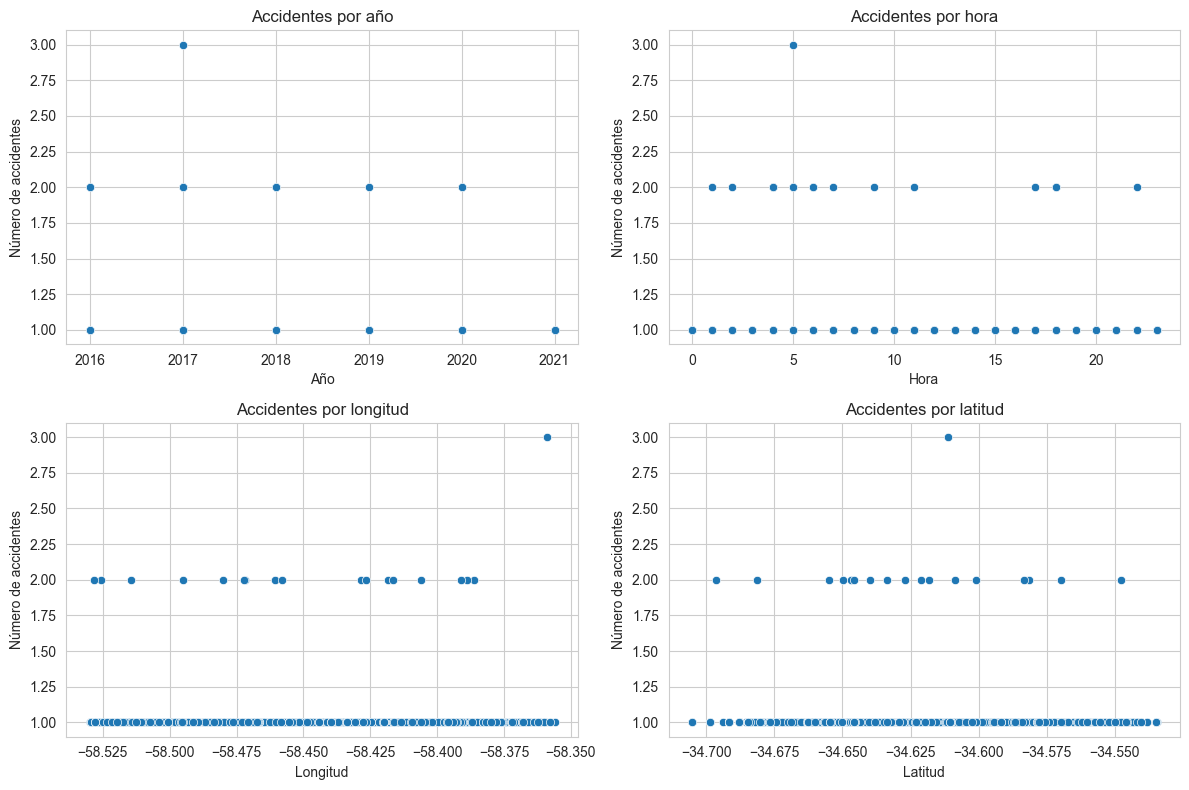

In [42]:
# Evalua si la relación entre 'N_VICTIMAS' y 'AAAA', 'HH', 'pos x', 'pos y' es de tipo lineal
# Configura el estilo de seaborn
sns.set_style("whitegrid")

# Crea la figura y las subtramas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico de accidentes por año
sns.scatterplot(data=df_hechos, x='AAAA', y='N_VICTIMAS', ax=axes[0, 0])
axes[0, 0].set_title('Accidentes por año')
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Número de accidentes')

# Gráfico de accidentes por hora
sns.scatterplot(data=df_hechos, x='HH', y='N_VICTIMAS', ax=axes[0, 1])
axes[0, 1].set_title('Accidentes por hora')
axes[0, 1].set_xlabel('Hora')
axes[0, 1].set_ylabel('Número de accidentes')

# Gráfico de accidentes por longitud
sns.scatterplot(data=df_hechos, x='pos x', y='N_VICTIMAS', ax=axes[1, 0])
axes[1, 0].set_title('Accidentes por longitud')
axes[1, 0].set_xlabel('Longitud')
axes[1, 0].set_ylabel('Número de accidentes')

# Gráfico de accidentes por latitud
sns.scatterplot(data=df_hechos, x='pos y', y='N_VICTIMAS', ax=axes[1, 1])
axes[1, 1].set_title('Accidentes por latitud')
axes[1, 1].set_xlabel('Latitud')
axes[1, 1].set_ylabel('Número de accidentes')

# Ajusta el diseño
plt.tight_layout()

# Muestra el gráfico
plt.show()

No se observa relacion lineal entre la fecha, hora, longitud o latitud y la cantidad de victimas, al parecer la cantidad de victimas no varia a los largo del día, de los años, ni la ubicación. Ya que no hay relacion lineal entre estas dos variables no es necesario calcular el coficiente de correlación de Pearson.

### df_victimas

#### Revisión inicial

Este dataframe 717 filas y 10 columnas, inicialmente no se encuentran valores nulos en ninguna de las columnas. Las columnas 'EDAD' y 'FECHA_FALLECIMIENTO' presentan datos tipo object cuando en realidad son int o datetime, por lo que se cambió el tipo de datos de acuerdo a las características de cada columna.

In [43]:
# Muestra las primeras filas del dataframe
df_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [44]:
# Brinda información resumida del dataframe
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [45]:
# Cuenta la cantidad de filas con valores nulos en cada columna
df_victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

##### Cambio de formato

In [46]:
# Cambia las columnas a formato numerico
df_victimas['EDAD'] = pd.to_numeric(df_victimas['EDAD'], downcast='integer', errors='coerce')

In [47]:
#Cambia el tipo de datos a solo fecha
df_victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_victimas['FECHA_FALLECIMIENTO'], errors='coerce')
# Extraer solo la parte de la fecha
df_victimas['FECHA_FALLECIMIENTO'] = df_victimas['FECHA_FALLECIMIENTO'].dt.date

Durante el proceso de conversión de formato, se identificaron nuevos datos nulos en las columnas 'EDAD' y 'FECHA_FALLECIMIENTO'. Al examinar esta fila específica en los datos originales, se observó que estos valores faltantes corresponden a 'SD', indicando que no hay datos disponibles. Aunque no es posible imputar estos datos, no se decide eliminarlos, ya que no afectan los cálculos que se pretenden realizar.

In [48]:
# Muestra las filas con datos nulos en la columna EDAD
nulos_edad = df_victimas[df_victimas['EDAD'].isnull()]
print(nulos_edad)

      ID_hecho      FECHA  AAAA  MM  DD                   ROL    VICTIMA  \
30   2016-0041 2016-03-29  2016   3  29  PASAJERO_ACOMPAÑANTE       MOTO   
33   2016-0045 2016-04-11  2016   4  11             CONDUCTOR       MOTO   
35   2016-0048 2016-04-15  2016   4  15                PEATON     PEATON   
36   2016-0049 2016-04-17  2016   4  17                    SD         SD   
39   2016-0052 2016-04-20  2016   4  20                    SD       MOTO   
55   2016-0077 2016-06-13  2016   6  13                PEATON     PEATON   
63   2016-0085 2016-06-29  2016   6  29                    SD       MOTO   
72   2016-0096 2016-07-25  2016   7  25             CONDUCTOR       MOTO   
89   2016-0115 2016-09-02  2016   9   2                    SD         SD   
93   2016-0119 2016-09-04  2016   9   4  PASAJERO_ACOMPAÑANTE         SD   
108  2016-0136 2016-10-25  2016  10  25             CONDUCTOR       MOTO   
119  2016-0148 2016-11-16  2016  11  16             CONDUCTOR       MOTO   
121  2016-01

In [49]:
# Muestra las filas con datos nulos en la columna FECHA_FALLECIMIENTO
nulos_fecha_fallecimiento = df_victimas[df_victimas['FECHA_FALLECIMIENTO'].isnull()]
print(nulos_fecha_fallecimiento)

      ID_hecho      FECHA  AAAA  MM  DD                   ROL VICTIMA  \
3    2016-0004 2016-01-10  2016   1  10             CONDUCTOR    MOTO   
16   2016-0022 2016-02-21  2016   2  21  PASAJERO_ACOMPAÑANTE    MOTO   
19   2016-0027 2016-02-28  2016   2  28  PASAJERO_ACOMPAÑANTE    AUTO   
22   2016-0031 2016-03-08  2016   3   8             CONDUCTOR    MOTO   
33   2016-0045 2016-04-11  2016   4  11             CONDUCTOR    MOTO   
..         ...        ...   ...  ..  ..                   ...     ...   
221  2017-0089 2017-07-13  2017   7  13                    SD      SD   
242  2017-0112 2017-09-10  2017   9  10  PASAJERO_ACOMPAÑANTE    AUTO   
246  2017-0115 2017-09-19  2017   9  19             CONDUCTOR    MOTO   
253  2017-0126 2017-10-14  2017  10  14  PASAJERO_ACOMPAÑANTE    AUTO   
280  2017-0155 2017-12-12  2017  12  12                    SD      SD   

          SEXO  EDAD FECHA_FALLECIMIENTO  
3    MASCULINO  18.0                 NaN  
16   MASCULINO  41.0                 

##### Revisión de valores únicos

In [50]:
# Revisa valores únicos de la columna AAAA
df_victimas['AAAA'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

Los valores de la columna AAAA estan acordes a los años correspondientes al periodoo de tiempo registrado.

In [51]:
# Revisa valores únicos de la columna MM
df_victimas['MM'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Los valores de al columna MM corresponden a la numeración de los meses.

In [52]:
# Revisa valores únicos de la columna DD
df_victimas['DD'].unique()

array([ 1,  2,  3, 10, 21, 24, 29,  8, 14, 15, 17, 28,  4, 12, 13, 19, 23,
       30, 31, 11, 20, 22, 25, 26, 16, 18, 27,  7,  9,  5,  6],
      dtype=int64)

Los valores de al columna DD corresponden a la numeración de los días del mes.

In [53]:
# Revisa valores únicos de la columna ROL
df_victimas['ROL'].unique()

array(['CONDUCTOR', 'PASAJERO_ACOMPAÑANTE', 'PEATON', 'SD', 'CICLISTA'],
      dtype=object)

Los valores de la columna 'ROL' corresponden a los mismos definidos en el diccionario de datos.

In [54]:
# Revisa valores únicos de la columna VICTIMA
df_victimas['VICTIMA'].unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL'], dtype=object)

Los valores de la columna 'VICTIMA' corresponden a los mismos definidos en el diccionario de datos.

In [55]:
# Revisa valores únicos de la columna SEXO
df_victimas['SEXO'].unique()

array(['MASCULINO', 'FEMENINO', 'SD'], dtype=object)

In [56]:
# Cuenta la cantidad de cada valor en la columna SEXO
df_victimas['SEXO'].value_counts()

SEXO
MASCULINO    545
FEMENINO     166
SD             6
Name: count, dtype: int64

En la columna 'SEXO' encontro el valor 'SD', este indica que no se tiene el dato disponible, es decir, es un valor faltante, se decide imputar este dato por la moda, ya que es valor mas comun en la columna y, por lo tanto, es una aproximación razonable para los valores faltantes. Además, al ser solo un pequeño número de filas, la imputación no debería tener un gran impacto en los resultados del análisis.

In [57]:
# Imputar los valores faltantes en la columna de sexo utilizando la moda
moda_sexo = df_victimas['SEXO'].mode()[0]
df_victimas['SEXO'] = df_victimas['SEXO'].replace('SD', moda_sexo)

#### Estadísticas descriptivas

In [58]:
df_victimas.describe(include='all')

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
count,717,717,717.000000,717.000000,717.000000,717,717,717,664.000000,649
unique,696,NaN,NaN,NaN,NaN,5,8,2,NaN,562
top,2017-0035,NaN,NaN,NaN,NaN,CONDUCTOR,MOTO,MASCULINO,NaN,2017-02-26
freq,3,NaN,NaN,NaN,NaN,330,303,551,NaN,3
mean,NaN,2018-09-09 01:36:24.100418304,2018.174338,6.688982,15.960948,NaN,NaN,NaN,42.167169,NaN
min,NaN,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,NaN,2017-04-01 00:00:00,2017.000000,4.000000,9.000000,NaN,NaN,NaN,27.000000,NaN
50%,NaN,2018-07-07 00:00:00,2018.000000,7.000000,16.000000,NaN,NaN,NaN,37.000000,NaN
75%,NaN,2019-12-18 00:00:00,2019.000000,10.000000,23.000000,NaN,NaN,NaN,56.250000,NaN
max,NaN,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,NaN,NaN,NaN,95.000000,NaN


- La columna ID_hecho tiene 21 valores duplicados. Esto se debe a que hubo accidentes con más de una víctima, por lo que la información de la segunda víctima en adelante se registra en una nueva fila.

- El rol que presenta la mayor cantidad de accidentes es el de conductor con 330 registros; conocer los roles mas vulnerables puede ayudar a enfocar las políticas de prevención.

- El genero masculino es el que tiene mayor ocurrencia de accidentes con un total de 545 registros.

In [59]:
# Filtra el df por filas duplicadas en la columna ID_hecho
duplicados = df_victimas[df_victimas.duplicated('ID_hecho', keep=False)]

# Mustra las filas duplicadas en la columna ID_hecho
duplicados.head(9)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
29,2016-0041,2016-03-29,2016,3,29,CONDUCTOR,MOTO,MASCULINO,54.0,2016-03-29
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,NaN,2016-03-30
98,2016-0126,2016-09-18,2016,9,18,CONDUCTOR,AUTO,MASCULINO,37.0,NaT
99,2016-0126,2016-09-18,2016,9,18,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,60.0,NaT
163,2017-0026,2017-02-26,2017,2,26,PASAJERO_ACOMPAÑANTE,AUTO,FEMENINO,23.0,2017-02-26
164,2017-0026,2017-02-26,2017,2,26,CONDUCTOR,AUTO,MASCULINO,19.0,2017-02-26
173,2017-0035,2017-03-23,2017,3,23,CONDUCTOR,AUTO,MASCULINO,28.0,2017-03-23
174,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32.0,2017-03-23
175,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30.0,2017-03-23


#### Visualización de datos

In [60]:
# Muestra tabla de frecuencia de victima por rol y sexo
rol_sexo_counts = df_victimas.groupby(['ROL', 'SEXO']).size().reset_index(name='Cantidad')
rol_sexo_counts

,ROL,SEXO,Cantidad
0,CICLISTA,FEMENINO,8
1,CICLISTA,MASCULINO,21
2,CONDUCTOR,FEMENINO,20
3,CONDUCTOR,MASCULINO,310
4,PASAJERO_ACOMPAÑANTE,FEMENINO,34
5,PASAJERO_ACOMPAÑANTE,MASCULINO,46
6,PEATON,FEMENINO,103
7,PEATON,MASCULINO,164
8,SD,FEMENINO,1
9,SD,MASCULINO,10


<Figure size 1800x600 with 0 Axes>

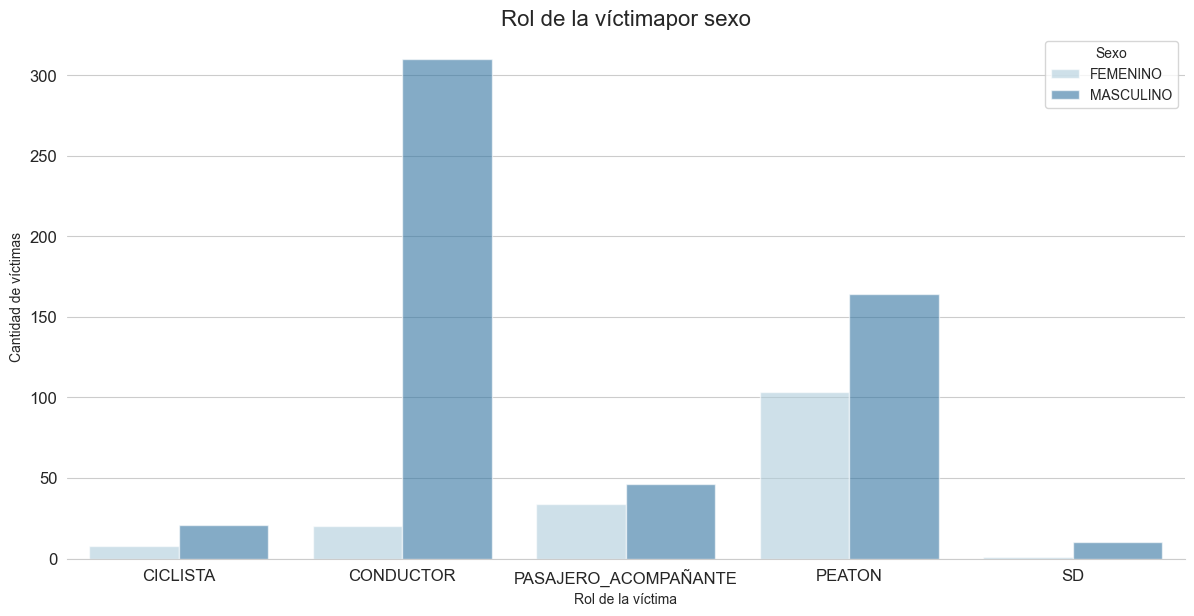

In [61]:
# Gráfico de barras rol de la víctima

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Tabla de frecuencia de rol de la víctima
rol_counts = df_victimas['ROL'].value_counts()

# Configura el tamaño del gráfico
plt.figure(figsize=(18, 6))

# Crea el gráfico de barras
g = sns.catplot(
    data=rol_sexo_counts, kind="bar",
    x="ROL", y="Cantidad", hue="SEXO",
    palette="Paired", alpha=.6, height=6,
    aspect=2,  # Ajusta el aspecto para hacer las barras más anchas
    
    legend_out=False  # Mantiene la leyenda dentro del gráfico
)
g.despine(left=True)
g.set_axis_labels("Rol de la víctima", "Cantidad de víctimas")
g.legend.set_title("Sexo")

# Añade un título
plt.title('Rol de la víctimapor sexo', fontsize=16)

# Aumenta el tamaño de la fuente en los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Muestra el gráfico
plt.show()

Más del 83% de las victimas ocupabam el rol de conductor o peatón.lo que sugiere que estos roles son los más vulnerables al momento de ocurrir el accidente.

In [62]:
# Muestra tabla de frecuencia de tipo de calle
df_victimas['SEXO'].value_counts()

SEXO
MASCULINO    551
FEMENINO     166
Name: count, dtype: int64

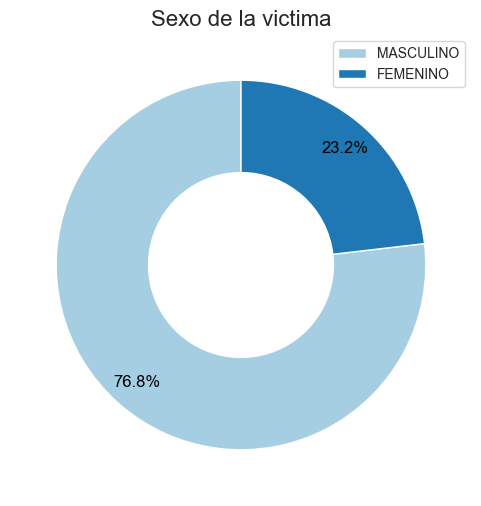

In [63]:
# Grafico de torta sexo

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Tabla de frecuencia de tipo de calle
sexo_counts = df_victimas['SEXO'].value_counts()

# Configura el tamaño del gráfico
plt.figure(figsize=(6, 6))

# Crea el gráfico de torta
plot = sexo_counts.plot(kind='pie', 
                              labels=None, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Paired"), wedgeprops=dict(width=0.5), 
                              textprops={'fontsize': 12, 'color': 'black'}, pctdistance=0.85) 

# Agrega las etiquetas de leyenda
plt.legend(labels=sexo_counts.index, loc="best")

# Añade un título
plt.title('Sexo de la victima', fontsize=16)

# Elimina el eje y
plt.ylabel(None)

# Muestra el gráfico
plt.show()

Más del 75% de las victimas pertenecen al sexo masculino.

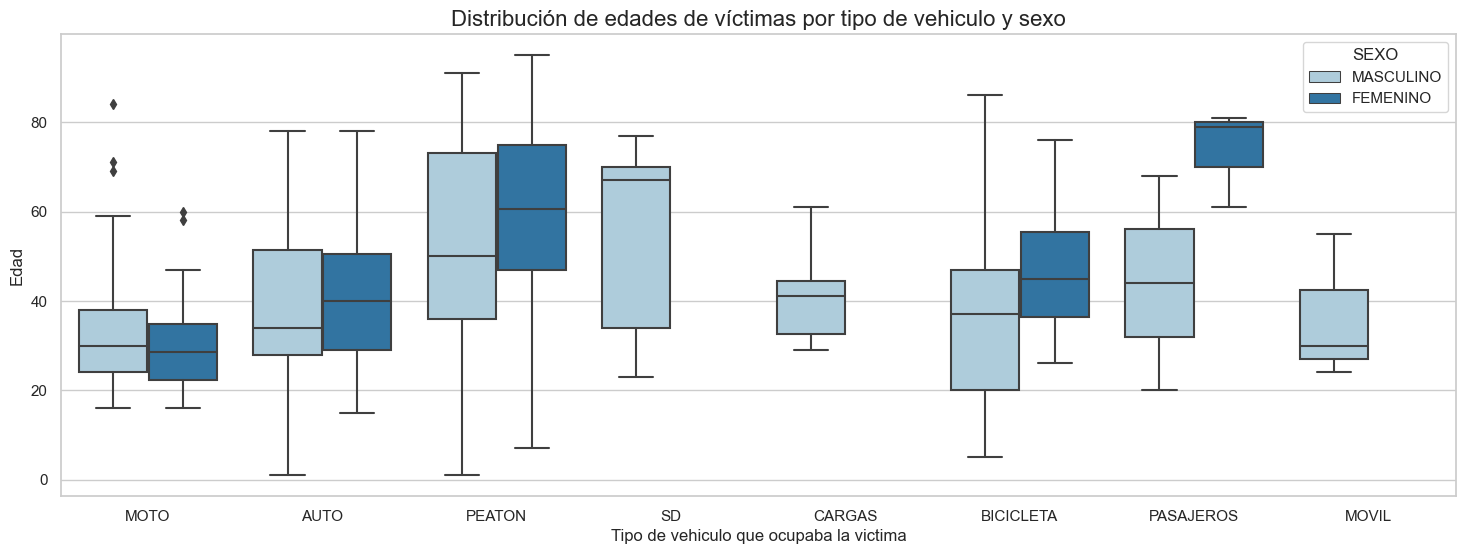

In [64]:
# Grafico distribución de edades de victimas por tipo de vehículo y sexo
# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea el violin plot
plt.figure(figsize=(18, 6))
sns.boxplot(x="VICTIMA", y="EDAD", data=df_victimas, palette="Paired", hue="SEXO")
plt.title('Distribución de edades de víctimas por tipo de vehiculo y sexo', fontsize=16)
plt.xlabel('Tipo de vehiculo que ocupaba la victima',fontsize=12)
plt.ylabel('Edad',fontsize=12)
plt.show()

- La mitad de las victimas de sexo masculino que se desplazaban en moto, auto, bicicleta o vehículos de emergencia tenian alrededor 30 años.
- La totalidad de las victimas de sexo femenino que se dessplazaban como pasajeros de transporte publico pertenecian a la tercera edad.
- Las victimas que se desplazaban como peatones son las que tienen el rango de edad más amplio, mientras las que se desplazaban en vehículos de emergencias presentan el rango de edad mas corto.

## Archivos limpios

Se generan archivos con los datos procesados para análisis y manipulación en otros programas.

In [72]:
# Genera nuevo archivo a partir de un dataframe
df_hechos.to_csv('C:/Users/57315/Documentos/Phyton_Henry/proyecto_data/datasets_limpios/df_hechos_clean.csv', index=False)
df_victimas.to_csv('C:/Users/57315/Documentos/Phyton_Henry/proyecto_data/datasets_limpios/df_victimas_clean.csv', index=False)